In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

In [2]:
data_1 = pd.read_csv('googleplaystore.csv')
data_2 = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
data_1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
data_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data_1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data_1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
data_1['Rating'] = data_1['Rating'].astype('float64')

In [8]:
data_1['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [9]:
data_1['Reviews'] = data_1['Reviews'].map(lambda x: x.rstrip('.0M'))


In [10]:
data_1[data_1['App']=='Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
data_1[data_1['Reviews']=='']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
478,Truth or Dare Pro,DATING,NaN,,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
621,Dating White Girls,DATING,NaN,,3.6M,50+,Free,0,Mature 17+,Dating,"July 20, 2018",1.0,4.0 and up
623,Geeks Dating,DATING,NaN,,13M,50+,Free,0,Mature 17+,Dating,"July 10, 2018",1.0,4.1 and up
627,CAM5678 Video Chat,DATING,NaN,,39M,500+,Free,0,Mature 17+,Dating,"July 13, 2018",5.5.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,NaN,,8.9M,10+,Free,0,Everyone,Lifestyle,"July 31, 2018",7.2.2,4.1 and up
10774,Miss FQ,NEWS_AND_MAGAZINES,NaN,,36M,10+,Free,0,Everyone,News & Magazines,"April 5, 2018",3.8,4.4 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,,1020k,50+,Paid,$1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up


In [12]:
data_1['Reviews'] = data_1['Reviews'].replace('','0').astype(object)

In [13]:
data_1['Reviews'] = data_1['Reviews'].apply(lambda x: int(x))

In [14]:
data_1.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.193338,4.146151e+05
std,0.537431,2.892939e+06
min,1.000000,0.000000e+00
25%,4.000000,2.900000e+01
50%,4.300000,1.623000e+03
75%,4.500000,4.384700e+04
max,19.000000,7.815831e+07


Total number of apps in playstore

In [15]:
data_1['App'].count()

10841

Categories of apps

In [16]:
data_1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [17]:
data_1['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [18]:
data_1['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

I'm converting the 0 value to Free assuming it cost no money to download

In [19]:
data_1['Type'] = data_1['Type'].replace('0','Free').astype(object)

In [20]:
# Checking the values again
data_1['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

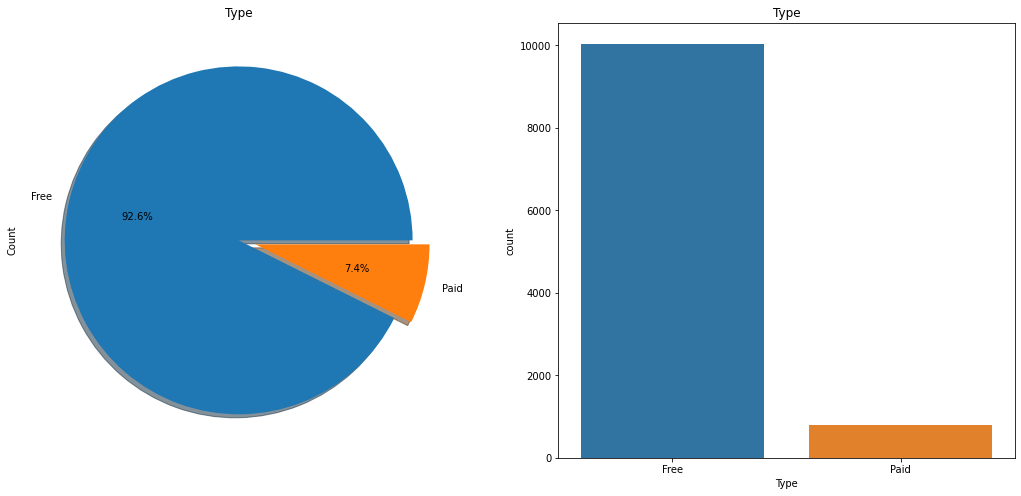

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_1['Type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type')
ax[0].set_ylabel('Count')
sns.countplot('Type',data=data_1,ax=ax[1],order=data_1['Type'].value_counts().index)
ax[1].set_title('Type')
plt.show()

[(0.0, 5.0)]

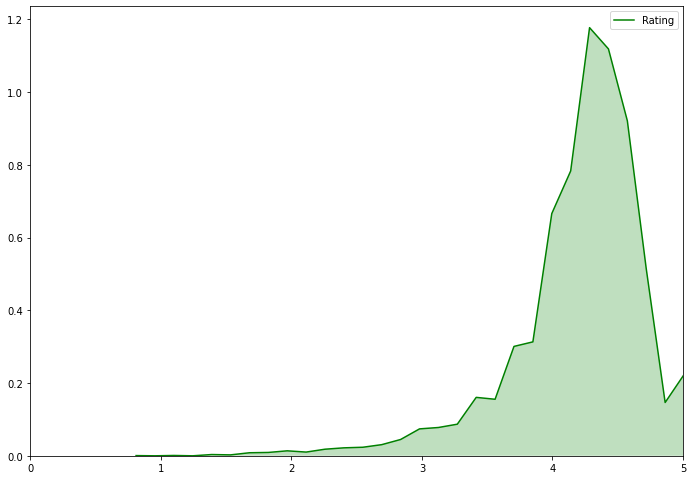

In [22]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data_1['Rating'],color='Green',shade=True)
g.set(xlim=(0,5))

Counting apps for each category

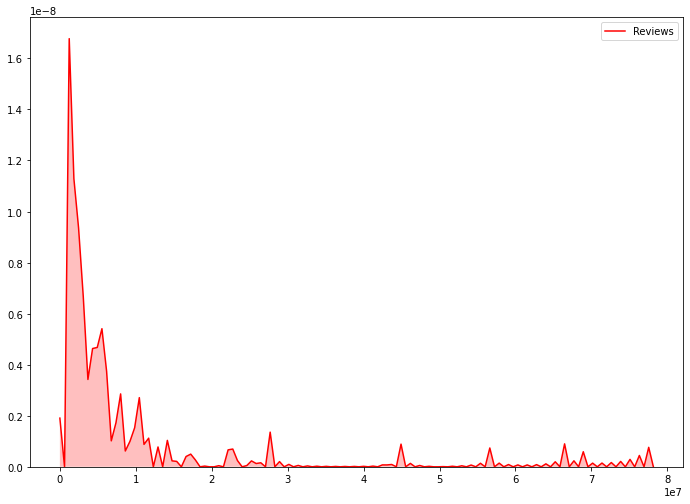

In [23]:
sns.kdeplot(data_1['Reviews'],color='Red',shade=True)

Text(0.5, 1.0, 'Count of app in each category')

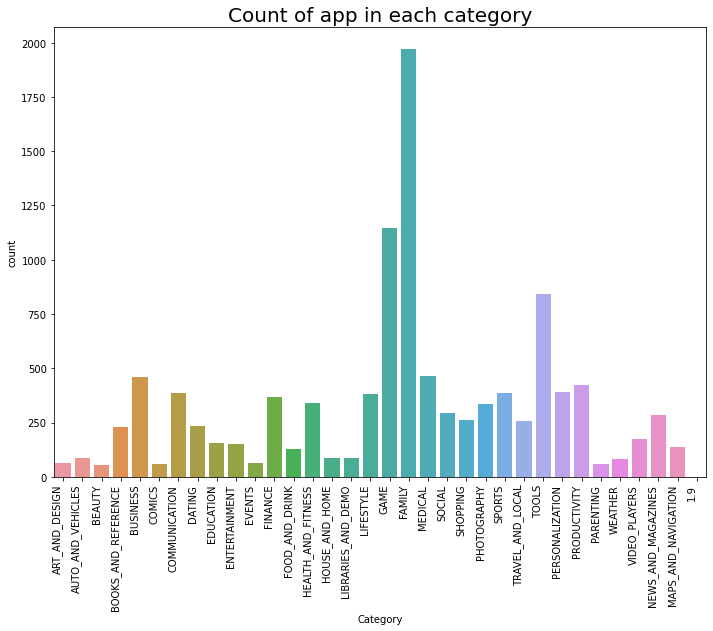

In [24]:
g = sns.countplot(data=data_1,x='Category')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g
plt.title("Count of app in each category",size=20)

Game and Family categories have the most apps

Text(0.5, 1.0, 'Boxplot of Rating vs Category')

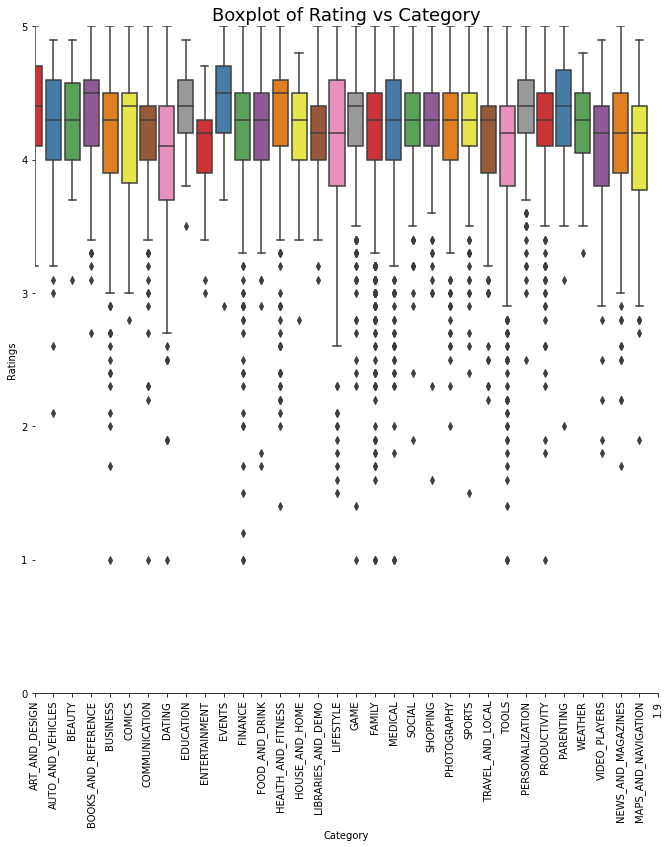

In [25]:
g = sns.catplot(x='Category',y='Rating',data=data_1,kind="box",height=10,palette='Set1')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g = g.set_ylabels('Ratings')
g.set(xlim=(0,33))
g.set(ylim=(0,5))
plt.title('Boxplot of Rating vs Category',size=18)

In [26]:
data_1[data_1['Reviews'] > 5000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,Battery Doctor-Battery Life Saver & Battery Co...,TOOLS,4.5,8190074,17M,"100,000,000+",Free,0,Everyone,Tools,"June 1, 2018",6.24,4.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15M,"100,000,000+",Free,0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up
8896,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633,14M,"100,000,000+",Free,0,Everyone,Tools,"June 5, 2018",4.8.7.8,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up


213 apps have more than 5M reviews

In [27]:
reviews = data_1[data_1['Reviews'] > 5000000]

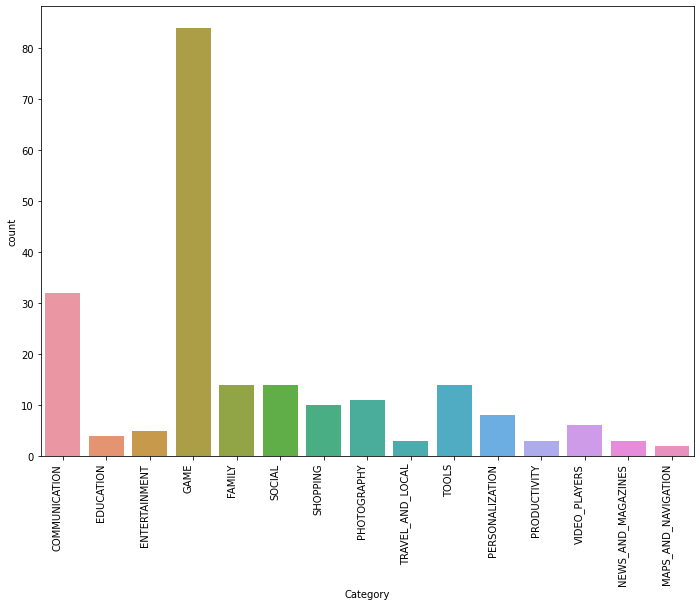

In [28]:
g = sns.countplot(data=reviews,x='Category')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g


Those apps who have reviews more than 5M reviews mostly belongs to game category

In [29]:
reviews['Type'].value_counts()

Free    213
Name: Type, dtype: int64

All of them are free apps

Making a dataframe for games which have a rating more than 4

In [30]:
game = reviews[(reviews['Category']=='GAME') & (reviews['Rating']>4)]

In [31]:
game.describe()

,Rating,Reviews
count,84.000000,8.400000e+01
mean,4.455952,1.245344e+07
std,0.109050,9.314102e+06
min,4.100000,5.091448e+06
25%,4.400000,6.073636e+06
50%,4.500000,8.655582e+06
75%,4.500000,1.420168e+07
max,4.600000,4.489389e+07


All of the games which have ratings more than 5M reviews have rating above 4

Increasing the condition of rating having above 4.5

In [32]:
game = reviews[(reviews['Category']=='GAME') & (reviews['Rating']>4.5)]

In [33]:
game.describe()

,Rating,Reviews
count,17.0,1.700000e+01
mean,4.6,1.702651e+07
std,0.0,1.462387e+07
min,4.6,5.418675e+06
25%,4.6,7.672495e+06
50%,4.6,9.882639e+06
75%,4.6,2.313478e+07
max,4.6,4.489389e+07


17 games have rating more than 4.5

In [34]:
game.nlargest(10,'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1704,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1878,Clash Royale,GAME,4.6,23136735,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1721,Clash Royale,GAME,4.6,23134775,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1660,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1932,Shadow Fight 2,GAME,4.6,10979062,88M,"100,000,000+",Free,0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
1902,Dream League Soccer 2018,GAME,4.6,9883806,74M,"100,000,000+",Free,0,Everyone,Sports,"July 16, 2018",5.064,4.4 and up
1739,Dream League Soccer 2018,GAME,4.6,9882639,74M,"100,000,000+",Free,0,Everyone,Sports,"July 16, 2018",5.064,4.4 and up
1910,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7674252,Varies with device,"100,000,000+",Free,0,Mature 17+,Action,"August 2, 2018",Varies with device,Varies with device


Clash of clans tops the list based on reviews 

In [35]:
game['Genres'].unique()

array(['Strategy', 'Action', 'Sports'], dtype=object)

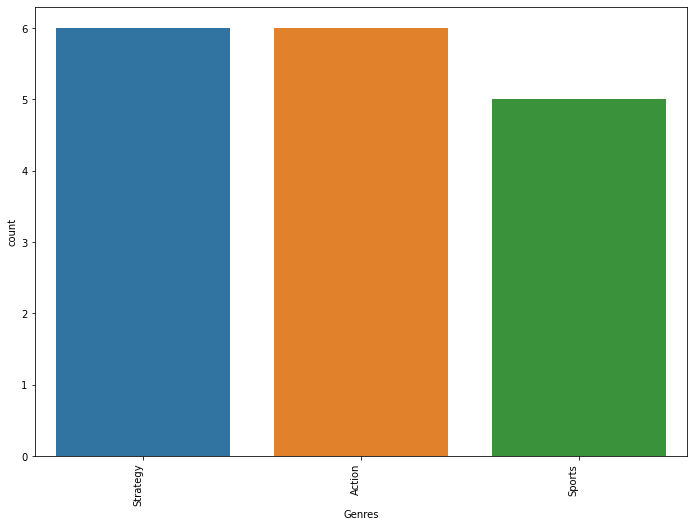

In [36]:
g = sns.countplot(data=game,x='Genres')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

In [37]:
family = reviews[reviews['Category']=='FAMILY']

In [38]:
family.describe()

,Rating,Reviews
count,14.000000,1.400000e+01
mean,4.471429,1.252658e+07
std,0.106904,1.027835e+07
min,4.300000,5.453997e+06
25%,4.400000,7.280463e+06
50%,4.500000,1.013402e+07
75%,4.500000,1.041660e+07
max,4.700000,4.488145e+07


14 apps have a category of family and have reviews more than 5M

In [39]:
family

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2050,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Varies with device,"100,000,000+",Free,0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device
2090,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Varies with device,"100,000,000+",Free,0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device
2216,Duolingo: Learn Languages Free,FAMILY,4.7,6294397,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
3879,Pou,FAMILY,4.3,10483141,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
3888,My Talking Tom,FAMILY,4.5,14885236,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3889,Netflix,FAMILY,4.4,5453997,Varies with device,"100,000,000+",Free,0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
3910,My Talking Angela,FAMILY,4.5,9876369,99M,"100,000,000+",Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up
3975,Hay Day,FAMILY,4.5,10053186,94M,"100,000,000+",Free,0,Everyone,Casual,"June 28, 2018",1_39_93,4.0.3 and up
3986,Clash of Clans,FAMILY,4.6,44881447,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


In [40]:
family['Genres'].unique()

array(['Casual;Action & Adventure', 'Education;Education', 'Casual',
       'Entertainment', 'Strategy'], dtype=object)

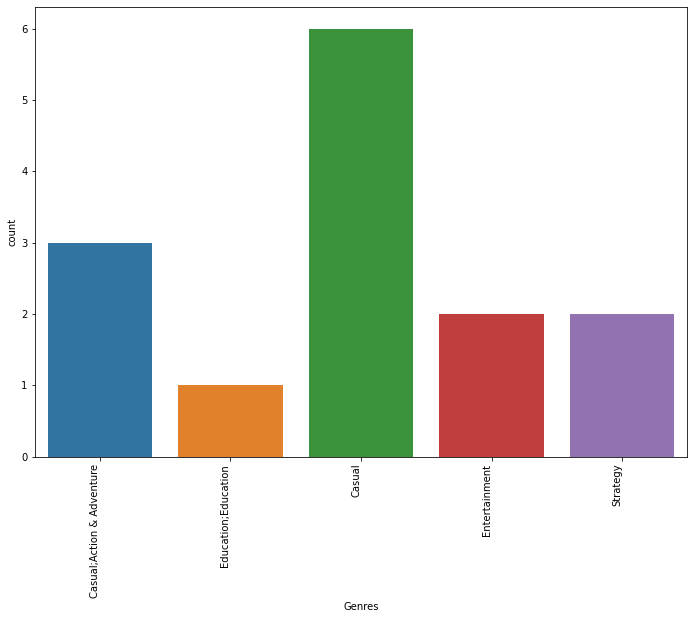

In [41]:
g = sns.countplot(data=family,x='Genres')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

<Figure size 720x720 with 0 Axes>

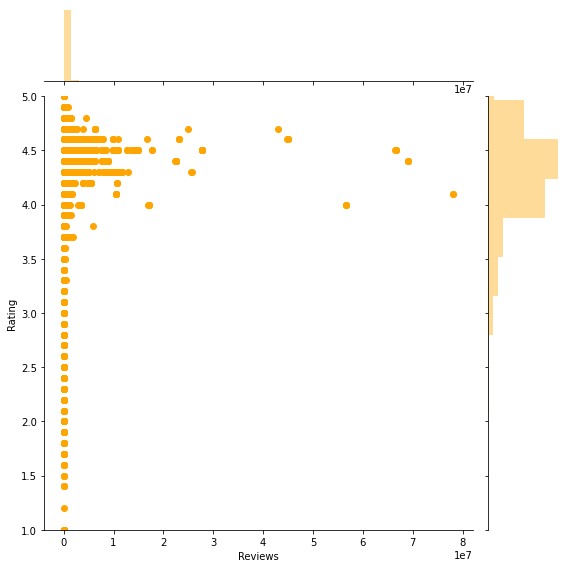

In [42]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data_1,size = 8,ylim = (1,5));

Text(0.5, 1.0, 'Rating VS Reveiws')

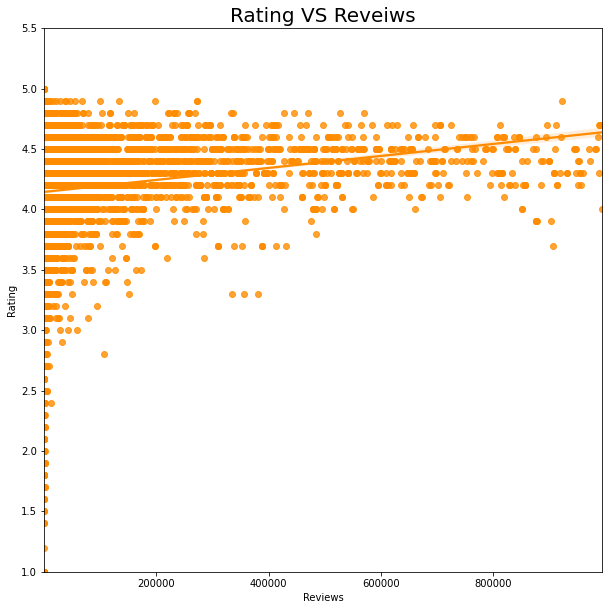

In [43]:
plt.figure(figsize = (10,10))
a = sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data_1[data_1['Reviews']<1000000]);
a.set(ylim=(1,5.5))
plt.title('Rating VS Reveiws',size = 20)

Apps with more reviews will have more rating

In [44]:
data_1['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [45]:
data_1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [46]:
data_1['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
885k                     1
82k                      1
730k                     1
288k                     1
351k                     1
Name: Size, Length: 462, dtype: int64

In [47]:
len(data_1['Size']=='Varies with device')

10841

In [48]:
data_1['Size'].replace('Varies with device',np.nan,inplace=True)

In [49]:
data_1['Size'] = data_1['Size'].astype(str).str.rstrip('kM+')

In [50]:
data_1['Size'] = data_1['Size'].str.replace(',','')

In [51]:
data_1['Size'] = data_1['Size'].astype(float)

In [52]:
data_1['Size'].fillna(data_1.groupby('Category')['Size'].transform('mean'),inplace=True)

In [53]:
data_1['Size'].describe()

count    10841.000000
mean        36.686721
std         91.418054
min          1.000000
25%          6.800000
50%         20.000000
75%         37.000000
max       1020.000000
Name: Size, dtype: float64

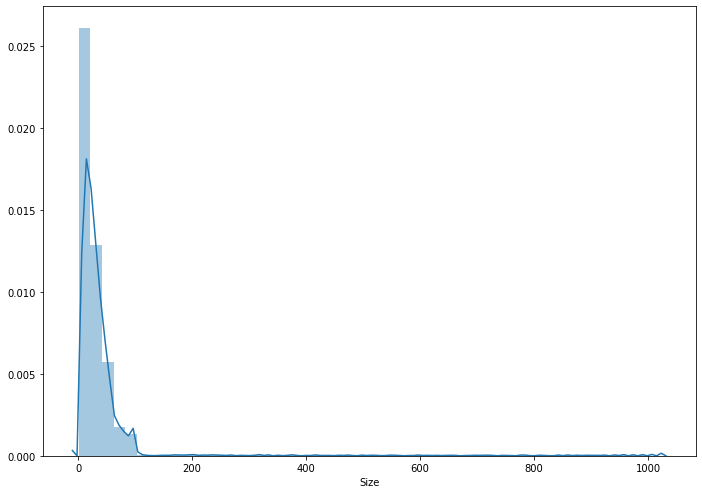

In [54]:
sns.distplot(data_1['Size'])

<Figure size 720x720 with 0 Axes>

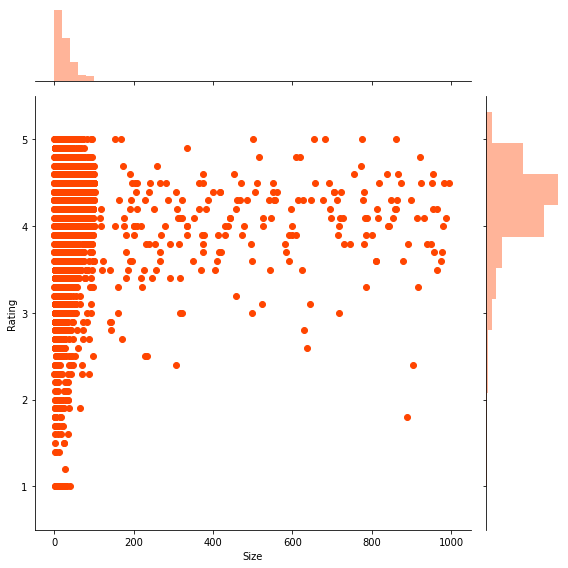

In [55]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data_1, size = 8,ylim=(0.5,5.5));

In [56]:
data_1['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [57]:
data_1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [58]:
data_1['Installs'] = data_1['Installs'].map(lambda x: x.rstrip('+'))

In [59]:
data_1['Installs'] = data_1['Installs'].str.replace(',','')
data_1['Installs'] = data_1['Installs'].str.replace('Free','1')
data_1['Installs'] = data_1['Installs'].astype(int)

In [60]:
Sorted_value = sorted(list(data_1['Installs'].unique()))

In [61]:
data_1['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [62]:
data_1['Installs'].head()

0     9
1    12
2    14
3    16
4    11
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

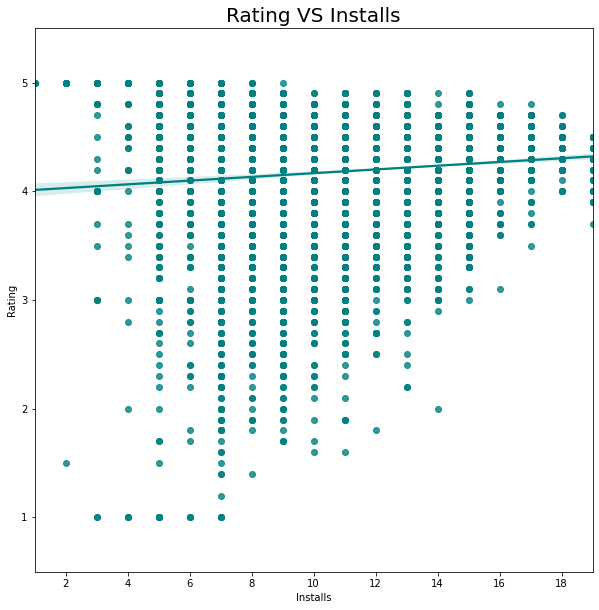

In [63]:
plt.figure(figsize = (10,10))
g = sns.regplot(x="Installs", y="Rating", color = 'teal',data=data_1);
g.set(ylim=(0.5,5.5))
plt.title('Rating VS Installs',size = 20)

In [64]:
data_1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [65]:
data_1['Price'] = data_1['Price'].str.replace('$','')
data_1['Price'] = data_1['Price'].str.replace('Everyone','0')

In [66]:
data_1['Price'] = data_1['Price'].astype(float)

In [67]:
data_1['Price'].describe()

count    10841.000000
mean         1.027273
std         15.948971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

most of the apps are free so the distribution of price isnt very good and more than 75% of price data is 0 dollar
and particular app has price of 400 dollars

In [68]:
data_1[data_1['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,9,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


Who buy's this?

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

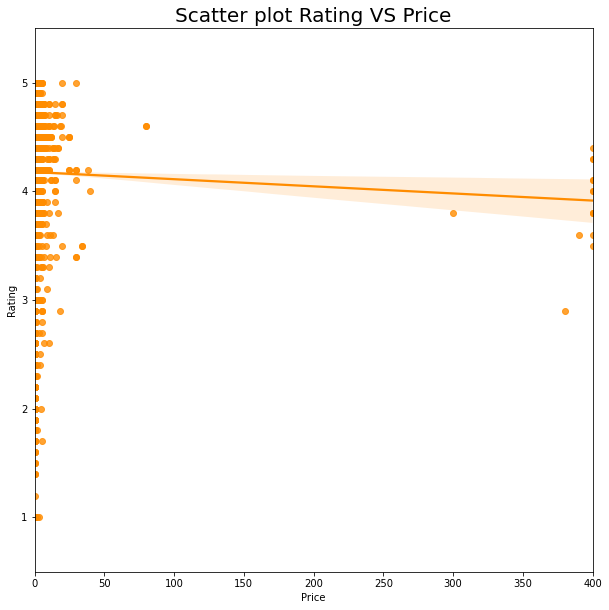

In [69]:
plt.figure(figsize = (10,10))
g = sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data_1[data_1['Reviews']<1000000]);
g.set(ylim=(0.5,5.5))
plt.title('Scatter plot Rating VS Price',size = 20)

In [70]:
data_1.loc[data_1['Price']==0,'PriceTag'] = 'Free'
data_1.loc[(data_1['Price']>0) & (data_1['Price']<=0.99),'PriceTag'] = 'cheap'
data_1.loc[(data_1['Price']>0.99) & (data_1['Price']<=2.99),'PriceTag'] = 'reasonable'
data_1.loc[(data_1['Price']>2.99) & (data_1['Price']<=4.99),'PriceTag'] = 'normal'
data_1.loc[(data_1['Price']>4.99) & (data_1['Price']<=14.99),'PriceTag'] = 'expensive'
data_1.loc[(data_1['Price']>14.99) & (data_1['Price']<=29.99),'PriceTag'] = 'too much expesnive'
data_1.loc[data_1['Price']>29.99,'PriceTag'] = 'extremely expensive'

In [71]:
data_1[['PriceTag','Rating']].groupby(['PriceTag'], as_index=False).mean()

,PriceTag,Rating
0,Free,4.187901
1,cheap,4.298131
2,expensive,4.269149
3,extremely expensive,3.923810
4,normal,4.250318
5,reasonable,4.293416
6,too much expesnive,4.252000


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

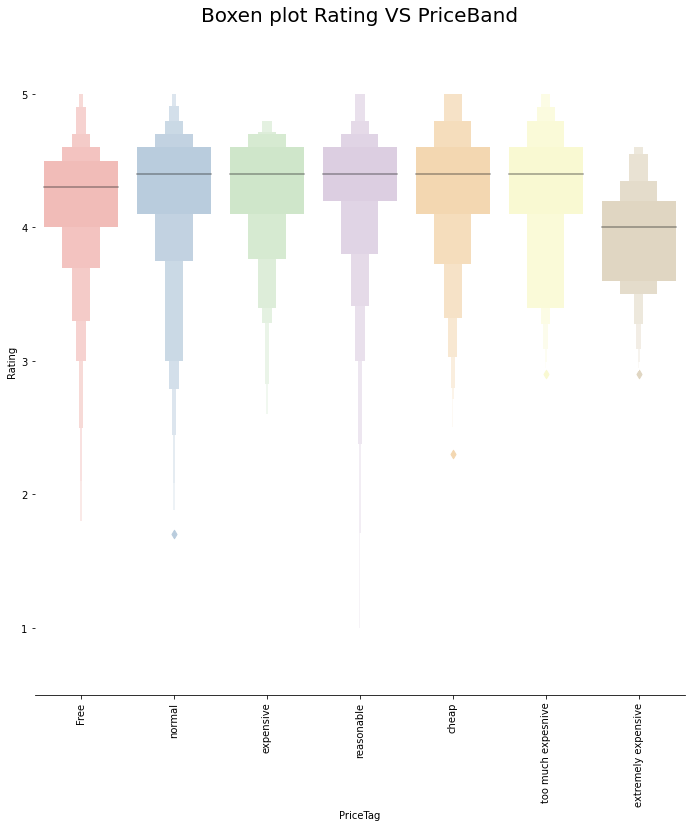

In [72]:
g = sns.catplot(x="PriceTag",y="Rating",data=data_1, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set(ylim=(0.5,5.5))
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

In [73]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

flatui = []
for i in range(0,len(data_1['Category'].unique()),1):
    flatui.append(generate_color())

Text(0.5, 1.0, 'Category in each Priceband VS Rating')

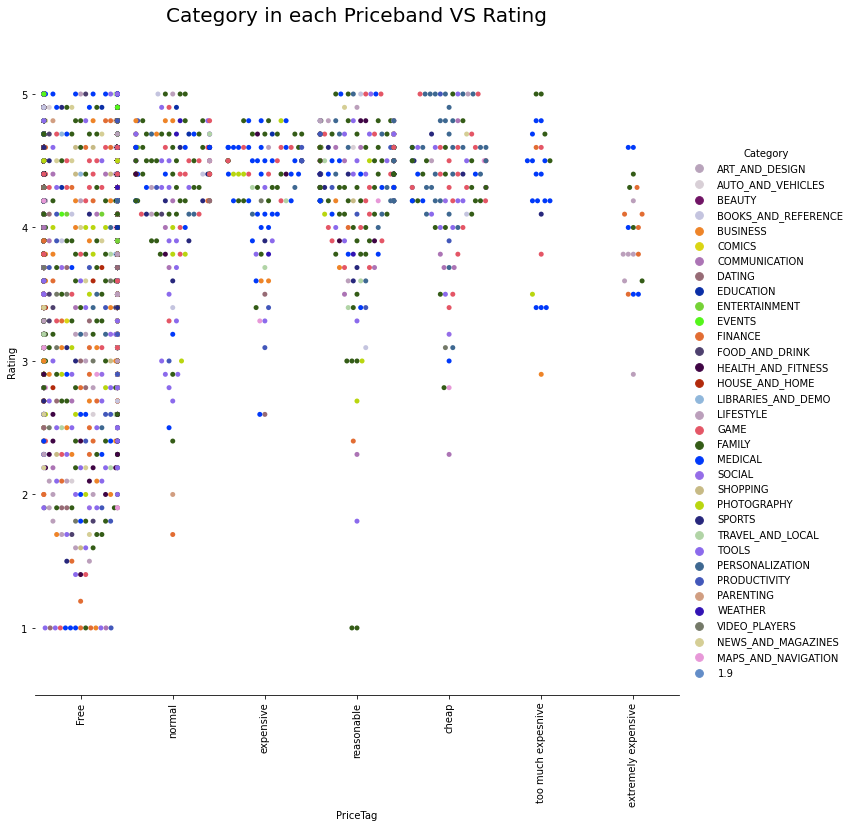

In [74]:
g = sns.catplot(x="PriceTag", y="Rating", hue="Category", kind="swarm", data=data_1,palette = flatui,size = 10)
g.despine(left=True)
g.set(ylim=(0.5,5.5))
g.set_xticklabels(rotation=90)
plt.title('Category in each Priceband VS Rating',size = 20)

In [75]:
data_1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

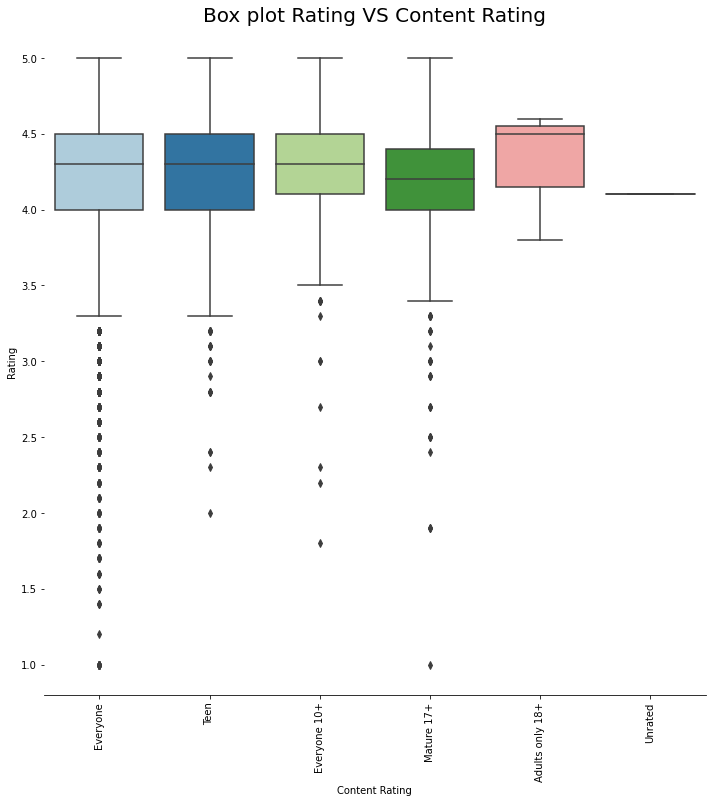

In [76]:
g = sns.catplot(x="Content Rating",y="Rating",data=data_1, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

In [77]:
data = pd.get_dummies(data_1, columns= ["Content Rating"])

In [78]:
print( len(data_1['Genres'].unique()) , "genres")

print("\n", data_1['Genres'].unique())

120 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creati

In [79]:
data.Genres.value_counts().head(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [80]:
data.Genres.value_counts().tail(10)

Lifestyle;Education                  1
Comics;Creativity                    1
Card;Brain Games                     1
Tools;Education                      1
Role Playing;Brain Games             1
Adventure;Brain Games                1
Role Playing;Education               1
Travel & Local;Action & Adventure    1
Racing;Pretend Play                  1
Arcade;Pretend Play                  1
Name: Genres, dtype: int64

In [81]:
data_1['Genres'] = data_1['Genres'].str.split(';').str[0]

In [82]:
print( len(data_1['Genres'].unique()) , "genres")

print("\n", data_1['Genres'].unique())

49 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino'
 'February 11, 2018']


In [84]:
data_1.Genres.value_counts().tail(10)

Comics               60
Parenting            60
Beauty               53
Card                 51
Casino               39
Trivia               39
Word                 29
Music                25
February 11, 2018     1
Music & Audio         1
Name: Genres, dtype: int64

In [85]:
data_1['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [86]:
data_1[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,48.000000
mean,4.518339
std,2.137188
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,19.000000


In [87]:
data_1[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [88]:
data_1[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
19,"February 11, 2018",19.0


Text(0.5, 1.0, 'Boxenplot of Rating VS Genres')

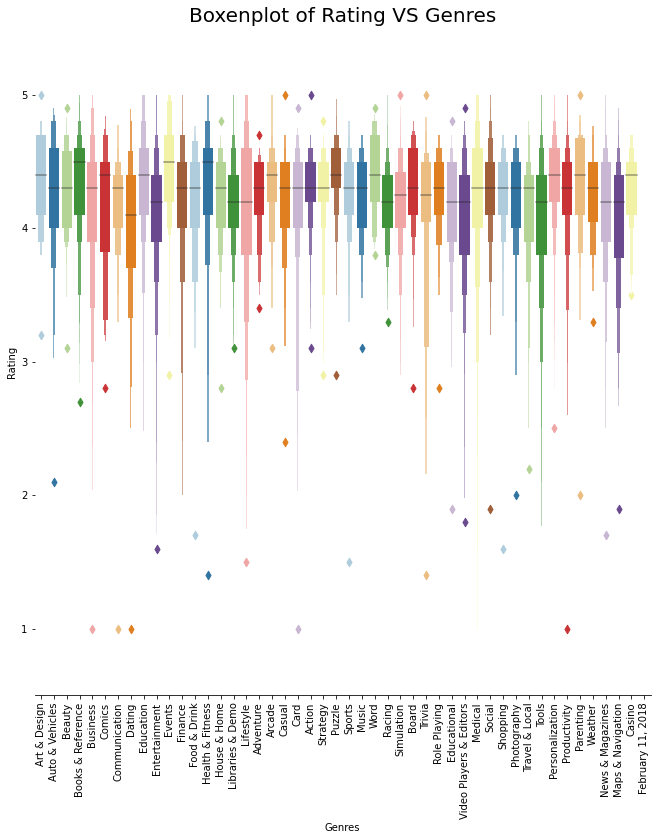

In [90]:
g = sns.catplot(x="Genres",y="Rating",data=data_1, kind="boxen", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
g.set(ylim=(0.5,5.5))
plt.title('Boxenplot of Rating VS Genres',size = 20)